In [3]:
import pandas as pd

# Load datasets
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

In [4]:
# Convert 'date' to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [5]:
print(sentiment_df.head())

    timestamp  value classification       date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02
2  1517635800     40           Fear 2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05


In [6]:
# Convert 'Timestamp IST' to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [7]:
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date

In [8]:
# Optional: Preview
print(trader_df[['Timestamp IST', 'trade_date']].head())

        Timestamp IST  trade_date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02


In [9]:
# Align sentiment date column
sentiment_df['date'] = sentiment_df['date'].dt.date

In [10]:
# Merge trader data with sentiment data
merged_df = pd.merge(trader_df, sentiment_df, left_on='trade_date', right_on='date', how='left')

In [11]:

# -----------------------------
print(merged_df.head())
print(merged_df[['trade_date', 'classification']].value_counts())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  5201

In [13]:
import os

# Create outputs directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# Now save the merged dataset
merged_df.to_csv('outputs/merged_trader_sentiment.csv', index=False)

print("✅ Cleaning and merging complete. Dataset saved to 'outputs/merged_trader_sentiment.csv'")


✅ Cleaning and merging complete. Dataset saved to 'outputs/merged_trader_sentiment.csv'


In [14]:
import pandas as pd

# Load merged dataset
merged_df = pd.read_csv('outputs/merged_trader_sentiment.csv')

# Preview structure
print(merged_df.head())
merged_df['classification'].value_counts()


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side        Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY  2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY  2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY  2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY  2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [15]:
# Check for missing sentiment classifications
missing_sentiment = merged_df['classification'].isnull().sum()
print(f"Missing sentiment classifications: {missing_sentiment}")

# Optional: Remove trades where sentiment data is unavailable
merged_df = merged_df.dropna(subset=['classification'])

# Confirm unique sentiment categories
print(merged_df['classification'].unique())


Missing sentiment classifications: 6
['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral']


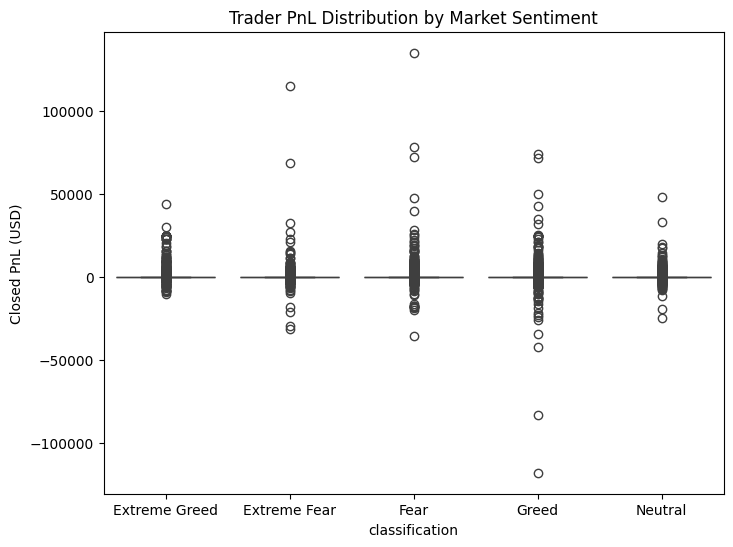

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: PnL by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Trader PnL Distribution by Market Sentiment')
plt.ylabel('Closed PnL (USD)')
plt.show()


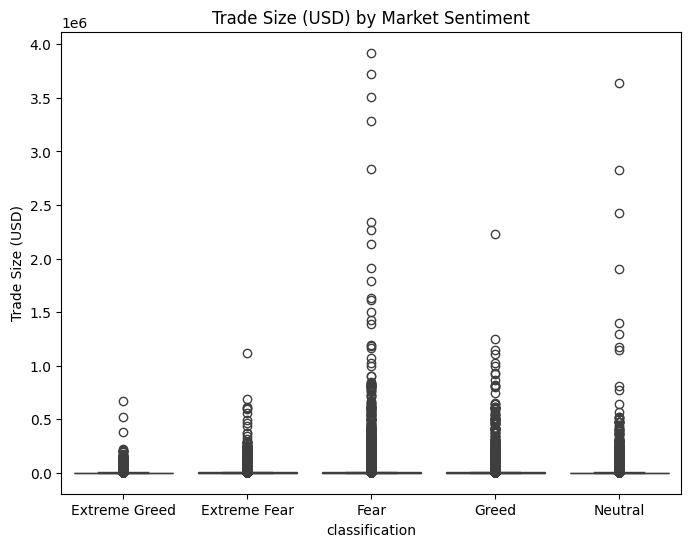

In [17]:
# Distribution of Position Size by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='classification', y='Size USD')
plt.title('Trade Size (USD) by Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.show()


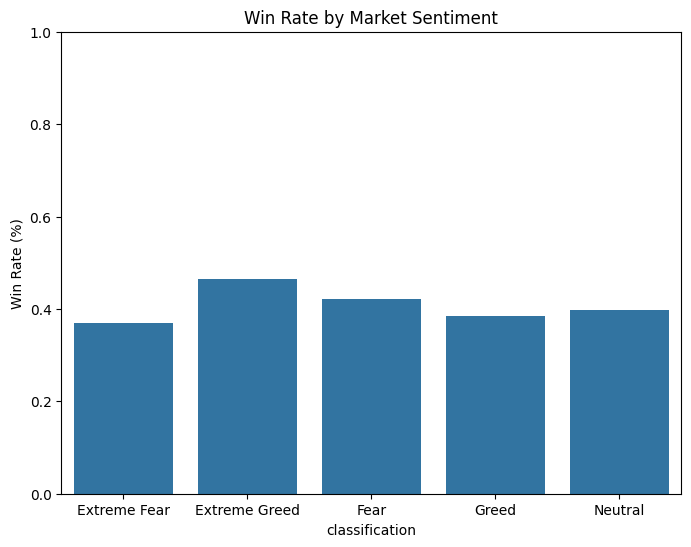

  classification       win
0   Extreme Fear  0.370607
1  Extreme Greed  0.464943
2           Fear  0.420768
3          Greed  0.384828
4        Neutral  0.396991


In [18]:
# Create win/loss flag
merged_df['win'] = merged_df['Closed PnL'] > 0

# Group and calculate win rates
win_rate = merged_df.groupby('classification')['win'].mean().reset_index()

# Barplot of win rates
plt.figure(figsize=(8, 6))
sns.barplot(data=win_rate, x='classification', y='win')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 1)
plt.show()

print(win_rate)


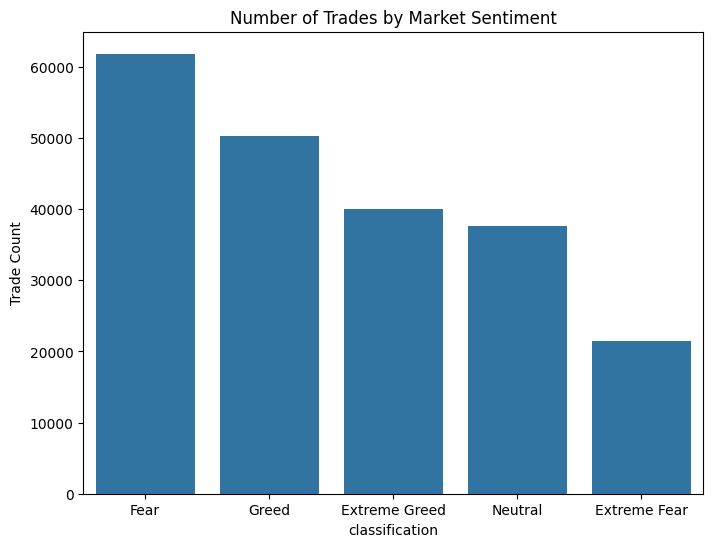

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [19]:
# Number of trades during each sentiment phase
trade_counts = merged_df['classification'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=trade_counts.index, y=trade_counts.values)
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Trade Count')
plt.show()

print(trade_counts)


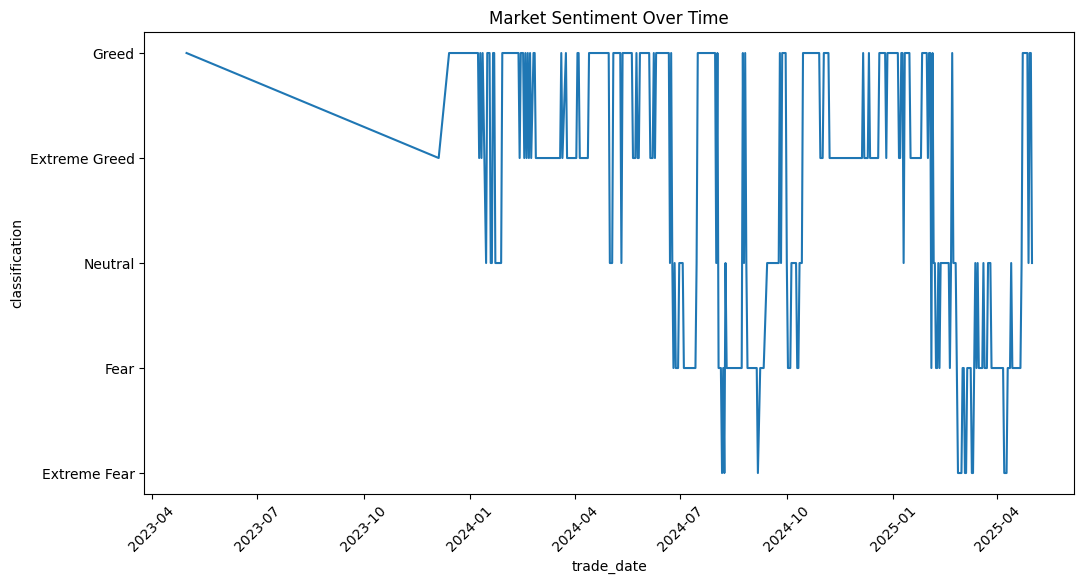

In [20]:
# Trend of Sentiment Over Time
merged_df['trade_date'] = pd.to_datetime(merged_df['trade_date'])

daily_sentiment = merged_df.groupby('trade_date')['classification'].agg(lambda x: x.mode()[0])

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment.reset_index(), x='trade_date', y='classification')
plt.title('Market Sentiment Over Time')
plt.xticks(rotation=45)
plt.show()
